In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
import pickle

#Simulation Parameters

n = 5 #Number of Agents
t = 100 #Number of timesteps
p1 = 0.1 #probability of the first bandit giving reward +1
p2 = 0.3 #probability of the second bandit giving reward +1
beta = 4*np.ones(n) #agent's inverse temperature
alpha1 = 0.15 #confirmatory learning rate
alpha2 = 0.05 #anti-conrfirmatory learning rate
K = 100 #number of simulations

In [5]:
#Functions to simulate
Qval = np.zeros((n,2)) #array to store the Q-values

def softmax(aQ,a_beta): 
    val = 1/(1+np.exp(-a_beta*(aQ[0]-aQ[1]))) #returns the softmax values
    return val,1-val 

def return_action(agent_id,Qval,beta):
    a_beta = beta[agent_id]
    aQ = Qval[agent_id]
    #print(a_beta)
    #print(aQ)
    probs = softmax(aQ,a_beta)
    #print(probs)
    action = np.random.choice([0,1],p = list(probs)) #chooses action based on softmax values
    return action

def bandit_reward(action):
    pss = [p1,p2] #stored in array for convenience
    return np.random.choice([1,-1],p=[pss[action],1-pss[action]]) #return reward from chosen bandit

def calculateUc(R,P,alpha1,alpha2,Qval,n,action,agent_id): #calculate the change to the Qvalues for chosen action
    val1 = 0
    val2 = 0
    #print(R,P)
    for id in R:
        val1 += (1-Qval[agent_id,action])
    val1 = alpha1*val1
    for id in P:
        val2 += (-1-Qval[agent_id,action])
    val2 = alpha2*val2
    return (val1+val2)/n

def calculateUu(R,P,alpha1,alpha2,Qval,n,action,agent_id): #calculate the change to the Qvalues for action not selected
    val1 = 0
    val2 = 0
    #print(R,P)
    for id in R:
        val1 += (1-Qval[agent_id,1-action])
    val1 = alpha2*val1
    for id in P:
        val2 += (-1-Qval[agent_id,1-action])
    val2 = alpha1*val2
    return (val1+val2)/n 

def softmax_mod(dQ,a_beta): 
    val = 1/(1+np.exp(-a_beta*(dQ))) #returns the softmax values
    return val

def multi_agent_two_armed_bandit(n,t,Qval,alpha1,alpha2,beta):
    net_reward = 0
    for i in range(t):
        Qval2 = np.copy(Qval)
        rewards = []
        actions = []
        b1_w = []
        b2_w = []
        b1_l = []
        b2_l = []
        for agent_id in range(n):
            action = return_action(agent_id,Qval,beta) #find the action and rewards of the agents
            reward = bandit_reward(action)
            actions.append(action)
            rewards.append(reward)
            if action == 0 and reward == -1: #classify the agents according to the action and rewards
                b1_l.append(agent_id)
            elif action == 0 and reward == 1:
                b1_w.append(agent_id)
            elif action == 1 and reward == -1:
                b2_l.append(agent_id)
            elif action==1 and reward == 1:
                b2_w.append(agent_id)
        net_reward+=sum(rewards)/n
        for agent_id in range(n): #update the q-values for the agent
            aic = actions[agent_id]
            if aic == 0: #set the sets of reward or penalty and action chosen or not chosen for particular agent
                Ric = b1_w
                Pic = b1_l
                Riu = b2_w
                Piu = b2_l
            else:
                Ric = b2_w
                Pic = b2_l
                Riu = b1_w
                Piu = b1_l
            Uc = calculateUc(Ric,Pic,alpha1,alpha2,Qval,n,aic,agent_id) #calculate the changes in Q's
            Uu = calculateUu(Riu,Piu,alpha1,alpha2,Qval,n,aic,agent_id)
            Qval2[agent_id,aic]+=Uc #update the Q values
            Qval2[agent_id,1-aic]+=Uu
        Qval = Qval2
    return (Qval[0,1]-Qval[0,0])-(Qval[1,1]-Qval[1,0])

def simulateKtimes(K,n,t,alpha1,alpha2,beta): #simulate for K times
    dQ_simuls = []
    for k in range(K):
        Qval = np.zeros((n,2)) #array to store the Q-values
        dQ_simuls.append(multi_agent_two_armed_bandit(n,t,Qval,alpha1,alpha2,beta))
        count,bins = np.histogram(dQ_simuls,bins = 48,range = (-3,3),density=True)
    return count,bins


## $\Delta Q$ gap difference distribution plot for poor conditions

In [ ]:
#Simulation Parameters 
ns = [2,5] #Number of Agents
t = 800 #Number of timesteps
p1 = 0.1 #probability of the first bandit giving reward +1
p2 = 0.3 #probability of the second bandit giving reward +1
betas = [4*np.ones(n) for n in ns] #agent's inverse temperature
bias = np.arange(1,5.1,0.1)
K = 800 #number of simulations
counts = []
bins = 0
for item in range(len(ns)):
    print(ns[item])
    cts = []
    for b in bias:
        print(round(b,2))
        alpha1 = 0.2*b/(b+1)
        alpha2 = 0.2/(b+1)
        beta = betas[item]
        x,y = simulateKtimes(K,ns[item],t,alpha1,alpha2,beta)
        cts.append(x)
        bins = y
    counts.append(cts)

counts = np.array(counts)

"""with open('fig4A.pkl', 'wb') as f:
    pickle.dump(counts, f)

with open('fig4A_bins.pkl', 'wb') as f:
    pickle.dump(bins, f)"""

2
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0
5
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0


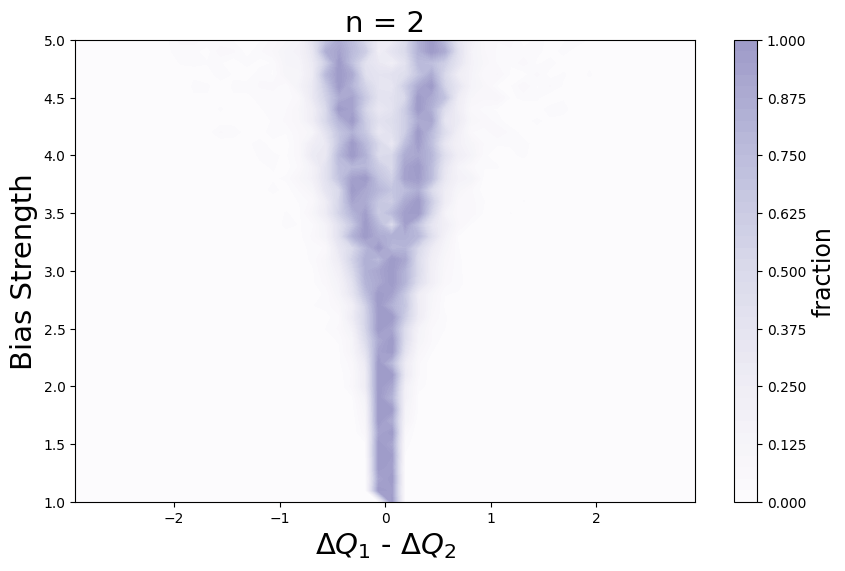

In [4]:
f = open('fig4A.pkl',"rb")
f1 = open('fig4A_bins.pkl',"rb")
data1 = pickle.load(f)[0]
bias = np.arange(1,5.1,0.1)
for i in range(data1.shape[0]):
    data1[i] = data1[i]/np.max(data1[i])
bins = pickle.load(f1)
bins = (bins[:-1] + bins[1:]) / 2
x,y = np.meshgrid(bins,bias)
plt.figure(figsize=(10, 6))
plt.contourf(x, y, data1, levels=40, cmap='Purples')
a = plt.colorbar()
plt.clim(vmax = 2)
a.set_label("fraction", fontsize=17) 
plt.xlabel(r"$\Delta Q_1$ - $\Delta Q_2$", fontsize=21)
plt.ylabel("Bias Strength", fontsize=21)
plt.title("n = 2",fontsize=21)
plt.savefig("fig4A.jpg",dpi = 500)

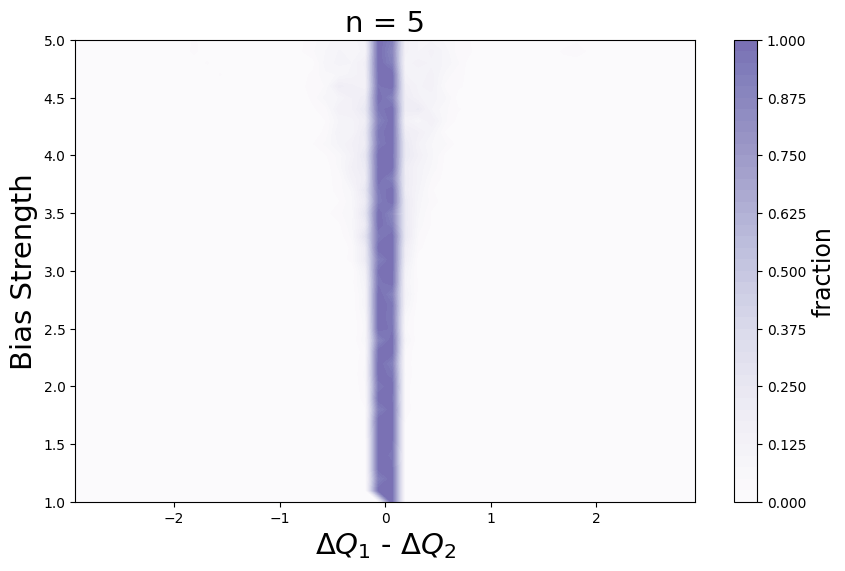

In [5]:
f = open('fig4A.pkl',"rb")
f1 = open('fig4A_bins.pkl',"rb")
data1 = pickle.load(f)[1]
bias = np.arange(1,5.1,0.1)
for i in range(data1.shape[0]):
    data1[i] = data1[i]/np.max(data1[i])
bins = pickle.load(f1)
bins = (bins[:-1] + bins[1:]) / 2
x,y = np.meshgrid(bins,bias)
plt.figure(figsize=(10, 6))
plt.contourf(x, y, data1, levels=40, cmap='Purples')
a = plt.colorbar()
plt.clim(vmax = 1.5)
a.set_label("fraction", fontsize=17) 
plt.xlabel(r"$\Delta Q_1$ - $\Delta Q_2$", fontsize=21)
plt.ylabel("Bias Strength", fontsize=21)
plt.title("n = 5",fontsize=21)
plt.savefig("fig4D.jpg",dpi = 500)

## $\Delta Q$ gap difference distribution plot for moderate conditions

In [ ]:
#Simulation Parameters 

ns = [2,5] #Number of Agents
t = 800 #Number of timesteps
p1 = 0.4 #probability of the first bandit giving reward +1
p2 = 0.6 #probability of the second bandit giving reward +1
betas = [4*np.ones(n) for n in ns] #agent's inverse temperature
bias = np.arange(1,5.1,0.1)
K = 800 #number of simulations
counts = []
bins = 0
for item in range(len(ns)):
    print(ns[item])
    cts = []
    for b in bias:
        print(round(b,2))
        alpha1 = 0.2*b/(b+1)
        alpha2 = 0.2/(b+1)
        beta = betas[item]
        x,y = simulateKtimes(K,ns[item],t,alpha1,alpha2,beta)
        cts.append(x)
        bins = y
    counts.append(cts)

counts = np.array(counts)

"""with open('fig4B.pkl', 'wb') as f:
    pickle.dump(counts, f)

with open('fig4B_bins.pkl', 'wb') as f:
    pickle.dump(bins, f)"""

2
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0
5
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0


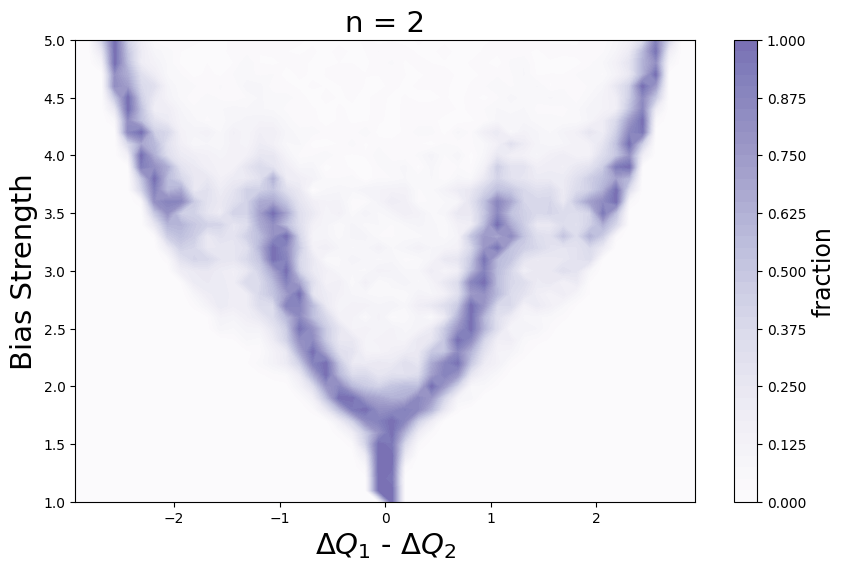

In [6]:
f = open('fig4B.pkl',"rb")
f1 = open('fig4B_bins.pkl',"rb")
data1 = pickle.load(f)[0]
bias = np.arange(1,5.1,0.1)
for i in range(data1.shape[0]):
    data1[i] = data1[i]/np.max(data1[i])
bins = pickle.load(f1)
bins = (bins[:-1] + bins[1:]) / 2
x,y = np.meshgrid(bins,bias)
plt.figure(figsize=(10, 6))
plt.contourf(x, y, data1, levels=40, cmap='Purples')
a = plt.colorbar()
plt.clim(vmax = 1.5)
a.set_label("fraction", fontsize=17) 
plt.xlabel(r"$\Delta Q_1$ - $\Delta Q_2$", fontsize=21)
plt.ylabel("Bias Strength", fontsize=21)
plt.title("n = 2",fontsize=21)
plt.savefig("fig4B.jpg",dpi = 500)

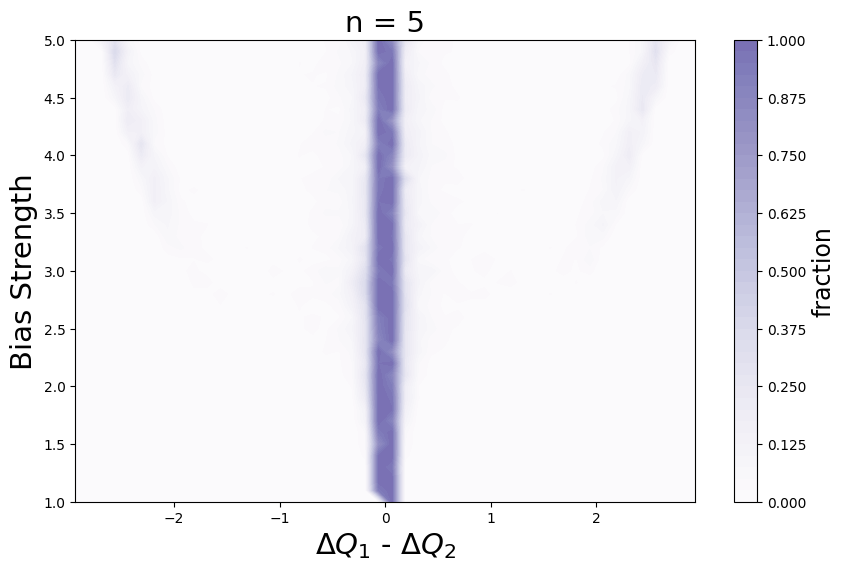

In [7]:
f = open('fig4B.pkl',"rb")
f1 = open('fig4B_bins.pkl',"rb")
data1 = pickle.load(f)[1]
bias = np.arange(1,5.1,0.1)
for i in range(data1.shape[0]):
    data1[i] = data1[i]/np.max(data1[i])
bins = pickle.load(f1)
bins = (bins[:-1] + bins[1:]) / 2
x,y = np.meshgrid(bins,bias)
plt.figure(figsize=(10, 6))
plt.contourf(x, y, data1, levels=40, cmap='Purples')
a = plt.colorbar()
plt.clim(vmax = 1.5)
a.set_label("fraction", fontsize=17) 
plt.xlabel(r"$\Delta Q_1$ - $\Delta Q_2$", fontsize=21)
plt.ylabel("Bias Strength", fontsize=21)
plt.title("n = 5",fontsize=21)
plt.savefig("fig4E.jpg",dpi = 500)

## $\Delta Q$ gap difference distribution plot for rich conditions

In [ ]:
#Simulation Parameters 

ns = [2,5] #Number of Agents
t = 800 #Number of timesteps
p1 = 0.7 #probability of the first bandit giving reward +1
p2 = 0.9 #probability of the second bandit giving reward +1
betas = [4*np.ones(n) for n in ns] #agent's inverse temperature
bias = np.arange(1,5.1,0.1)
K = 800 #number of simulations
counts = []
bins = 0
for item in range(len(ns)):
    print(ns[item])
    cts = []
    for b in bias:
        print(round(b,2))
        alpha1 = 0.2*b/(b+1)
        alpha2 = 0.2/(b+1)
        beta = betas[item]
        x,y = simulateKtimes(K,ns[item],t,alpha1,alpha2,beta)
        cts.append(x)
        bins = y
    counts.append(cts)

counts = np.array(counts)

"""with open('fig4C.pkl', 'wb') as f:
    pickle.dump(counts, f)

with open('fig4C_bins.pkl', 'wb') as f:
    pickle.dump(bins, f)"""

2
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0
5
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0


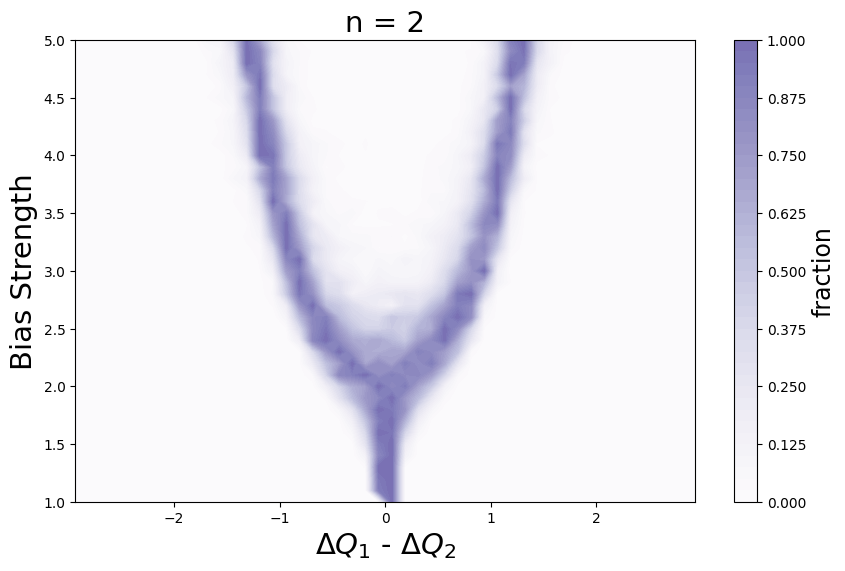

In [8]:
f = open('fig4C.pkl',"rb")
f1 = open('fig4C_bins.pkl',"rb")
data1 = pickle.load(f)[0]
bias = np.arange(1,5.1,0.1)
for i in range(data1.shape[0]):
    data1[i] = data1[i]/np.max(data1[i])
bins = pickle.load(f1)
bins = (bins[:-1] + bins[1:]) / 2
x,y = np.meshgrid(bins,bias)
plt.figure(figsize=(10, 6))
plt.contourf(x, y, data1, levels=40, cmap='Purples')
a = plt.colorbar()
plt.clim(vmax = 1.5)
a.set_label("fraction", fontsize=17) 
plt.xlabel(r"$\Delta Q_1$ - $\Delta Q_2$", fontsize=21)
plt.ylabel("Bias Strength", fontsize=21)
plt.title("n = 2",fontsize=21)
plt.savefig("fig4C.jpg",dpi = 500)

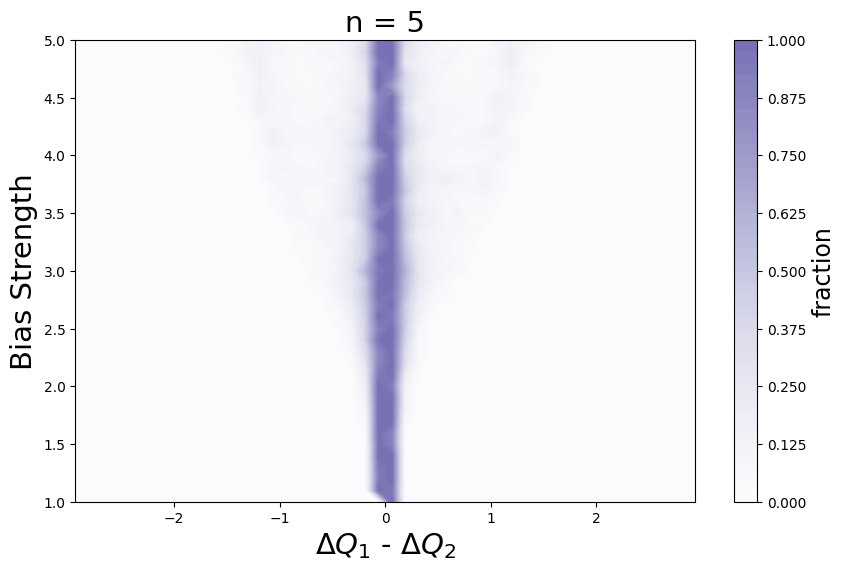

In [9]:
f = open('fig4C.pkl',"rb")
f1 = open('fig4C_bins.pkl',"rb")
data1 = pickle.load(f)[1]
bias = np.arange(1,5.1,0.1)
for i in range(data1.shape[0]):
    data1[i] = data1[i]/np.max(data1[i])
bins = pickle.load(f1)
bins = (bins[:-1] + bins[1:]) / 2
x,y = np.meshgrid(bins,bias)
plt.figure(figsize=(10, 6))
plt.contourf(x, y, data1, levels=40, cmap='Purples')
a = plt.colorbar()
plt.clim(vmax = 1.5)
a.set_label("fraction", fontsize=17) 
plt.xlabel(r"$\Delta Q_1$ - $\Delta Q_2$", fontsize=21)
plt.ylabel("Bias Strength", fontsize=21)
plt.title("n = 5",fontsize=21)
plt.savefig("fig4F.jpg",dpi = 500)